In [1]:
import pandas as pd
from pyplotz.pyplotz import PyplotZ, plt
pltz = PyplotZ()
pltz.enable_chinese()

# Historical prices

In [2]:
# Parameter
price_path = "../data/clean_data/china_stock_price_20200906.csv"
stock_list = ["伊利股份", "海螺水泥", "恒瑞医药"]

In [3]:
df_all = pd.read_csv(price_path)
df_p = df_all[df_all["name"].isin(stock_list)][["symbol", "name", "trade_date", "close"]]
df_p["trade_date"] = pd.to_datetime(df_p["trade_date"])
df_p["trade_date"] = df_p["trade_date"].dt.to_period("M").astype(str)
df_p["trade_date"] = pd.to_datetime(df_p["trade_date"])
df_p = df_p.groupby(["symbol", "name", "trade_date"])["close"].mean().reset_index()
df_p = df_p.pivot_table(values="close", index=["trade_date"], columns="name").reset_index()
df_p = df_p.sort_values("trade_date")
df_p = df_p.set_index("trade_date")

In [4]:
df_p.head()

name,伊利股份,恒瑞医药,海螺水泥
trade_date,,,
1999-08-01,33.589231,NaN,NaN
1999-09-01,26.990909,NaN,NaN
1999-10-01,25.739375,NaN,NaN
1999-11-01,25.865000,NaN,NaN
1999-12-01,21.277619,NaN,NaN


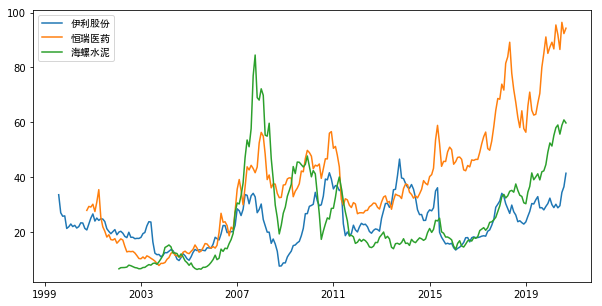

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df_p["伊利股份"], label="伊利股份")
plt.plot(df_p["恒瑞医药"], label="恒瑞医药")
plt.plot(df_p["海螺水泥"], label="海螺水泥")
pltz.legend()
plt.show()

# Computing Drawdowns

1. Convert the time series of returns to a time series that represents a wealth index
2. Compute a time series of the previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value

In [8]:
df_r = df_p.pct_change()

In [12]:
# Step 1
wealth_index = (df_r["恒瑞医药"].dropna() + 1).cumprod()

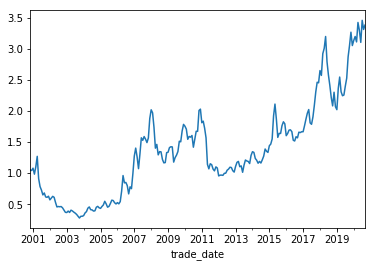

In [16]:
wealth_index.plot()

In [13]:
# Step 2
previous_peaks = wealth_index.cummax()

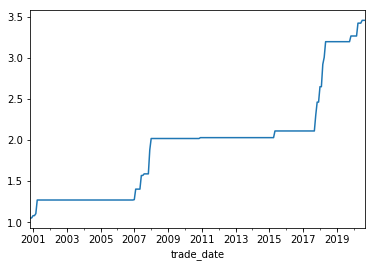

In [17]:
previous_peaks.plot()

In [14]:
# Step 3
drawdown = (wealth_index - previous_peaks) / previous_peaks

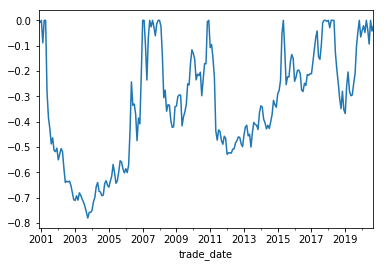

In [18]:
drawdown.plot()

In [19]:
drawdown.min()

-0.7805468141186359